In [1]:
import pandas as pd

In [2]:
# 데이터 경로
train_data = pd.read_csv('./data/train.csv', index_col='id')
test_data = pd.read_csv('./data/test.csv', index_col='id')

# 01. 데이터 합치기

In [3]:
all_data = pd.concat([train_data, test_data])  # Train_data와 Test_data 합치기

In [4]:
all_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0.0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0.0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0.0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1.0
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0.0


In [5]:
new_data = all_data.drop('target', axis=1)
new_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8


# 이진 피처 인코딩(bin_3, bin_4)

In [6]:
# T와 Y는 1로, F와 N은 0으로 변경하기

In [7]:
new_data['bin_3'] = new_data['bin_3'].map({'F':0, 'T':1})
new_data['bin_4'] = new_data['bin_4'].map({'N':0, 'Y':1})

In [8]:
new_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8


# 순서형 피처 인코딩(ord_1, ord_2)

In [9]:
ord1dict = {'Novice':0, 'Contributor':1, 'Expert':2, 'Master':3, 'Grandmaster':4}
ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2, 'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}

In [10]:
new_data['ord_1'] = new_data['ord_1'].map(ord1dict)
new_data['ord_2'] = new_data['ord_2'].map(ord2dict)
new_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,4,1,h,D,kr,2,2
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,4,3,a,A,bF,7,8
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,2,5,h,R,Jc,7,2
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,4,4,i,D,kW,2,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,4,0,a,R,qP,7,8


# 순서형 피처 인코딩(ord_3, ord_4, ord_5)

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
ord_345 = ['ord_3', 'ord_4', 'ord_5']

In [13]:
# OrdinalEncoder 객체 생성
ord_encoder = OrdinalEncoder() 

In [14]:
# ordinal 인코딩 적용
new_data[ord_345] = ord_encoder.fit_transform(new_data[ord_345])

In [15]:
# 피처별 인코딩 순서 출력
for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)

ord_3
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
ord_4
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.]
ord_5
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 1

In [16]:
new_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,4,1,7.0,3.0,136.0,2,2
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,4,3,0.0,0.0,93.0,7,8
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,2,5,7.0,17.0,31.0,7,2
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,4,4,8.0,3.0,134.0,2,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,4,0,0.0,17.0,158.0,7,8


# 명목형 피처 인코딩('nom_0' ~ 'nom_9')

## 명목형 피처는 순서를 무시해도 되기 때문에 원-핫 인코딩을 적용한다.

In [17]:
nom_features = ['nom_' + str(i) for i in range(10)]  # 명목형 피처

In [18]:
nom_features

['nom_0',
 'nom_1',
 'nom_2',
 'nom_3',
 'nom_4',
 'nom_5',
 'nom_6',
 'nom_7',
 'nom_8',
 'nom_9']

In [19]:
# 이 명목형 피처를 원-핫 인코딩해 별도 행렬에 저장하고,
# 이어서 new_data에서 명목형 피처를 삭제한다.

In [20]:
# 정상 실행되는 코드
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder() # OneHotEncoder 객체 생성
# 원-핫 인코딩 적용
encoded_nom_matrix = onehot_encoder.fit_transform(new_data[nom_features])

encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [21]:
# 마지막으로 new_data에서 기존 명목형 피처를 삭제한다.

In [22]:
new_data = new_data.drop(nom_features, axis=1) # 기존 명목형 피처 삭제

In [23]:
new_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,
0,0,0,0,1,1,2,4,1,7.0,3.0,136.0,2,2
1,0,1,0,1,1,1,4,3,0.0,0.0,93.0,7,8
2,0,0,0,0,1,1,2,5,7.0,17.0,31.0,7,2
3,0,1,0,0,1,1,4,4,8.0,3.0,134.0,2,1
4,0,0,0,0,0,1,4,0,0.0,17.0,158.0,7,8


# 날짜 피처 인코딩

In [24]:
date_features = ['day', 'month'] # 날짜 피처

# 원-핫 인코딩 적용
encoded_date_matrix = onehot_encoder.fit_transform(new_data[date_features])

new_data = new_data.drop(date_features, axis=1) # 기존 날짜 피처 삭제

encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

# 순서형 피처 스케일링

In [25]:
# 다른 피처들과 범위를 맞추기 위해 순서형 피처에 min-max 정규화를 적용한다.
# min-max 정규화는 피처 값의 범위를 0~1로 조정한다.

In [26]:
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_' + str(i) for i in range(6)] # 순서형 피처

# min-max 정규화
new_data[ord_features] = MinMaxScaler().fit_transform(new_data[ord_features])  # ( 객체 생성과 훈련을 동시에 함 )

# 인코딩 및 스케일링된 피처 합치기

In [27]:
# ( 아나콘다 터미널 들어가서 pip list >> scipy가 있는지 확인할 것 )

In [28]:
from scipy import sparse

# 인코딩 및 스케일링된 피처 합치기
new_data_sprs = sparse.hstack([sparse.csr_matrix(new_data),
                               encoded_nom_matrix,
                               encoded_date_matrix],
                               format='csr')

In [29]:
new_data_sprs

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9163718 stored elements in Compressed Sparse Row format>

# 훈련 데이터와 테스트 데이터를 나눈다

In [30]:
num_train = len(train_data) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = new_data_sprs[:num_train] # 0~num_train - 1행
X_test = new_data_sprs[num_train:] # num_train~마지막 행

y = train_data['target']

In [31]:
from sklearn.model_selection import train_test_split
# 훈련 데이터, 검증 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
                                                      test_size=0.1,
                                                      stratify=y,
                                                      random_state=10)

In [32]:
# 그리드 서치로 최적화

In [33]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
logistic_model = LogisticRegression()

CPU times: total: 15.6 ms
Wall time: 48.9 ms


In [34]:
# 하이퍼파라미터 값 목록
lr_params = {'C':[0.1, 0.125, 0.2], 'max_iter':[800, 900, 1000],
             'solver':['liblinear'], 'random_state':[42]}

In [35]:
# 그리드서치 객체 생성
gridsearch_logistic_model = GridSearchCV(estimator=logistic_model,
                                         param_grid=lr_params,
                                         scoring='roc_auc', # 평가지표
                                         cv=5)

In [36]:
# 그리드서치 수행
gridsearch_logistic_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.125, 0.2], 'max_iter': [800, 900, 1000],
                         'random_state': [42], 'solver': ['liblinear']},
             scoring='roc_auc')

In [37]:
print('최적 하이퍼파라미터:', gridsearch_logistic_model.best_params_)

최적 하이퍼파라미터: {'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}


In [38]:
# 모델 성능 검증

In [39]:
y_valid_preds = gridsearch_logistic_model.predict_proba(X_valid)[:, 1]

In [40]:
# 검증 데이터 ROC AUC를 구한다.

In [41]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수

# 검증 데이터 ROC AUC
roc_auc = roc_auc_score(y_valid, y_valid_preds)
print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.8045


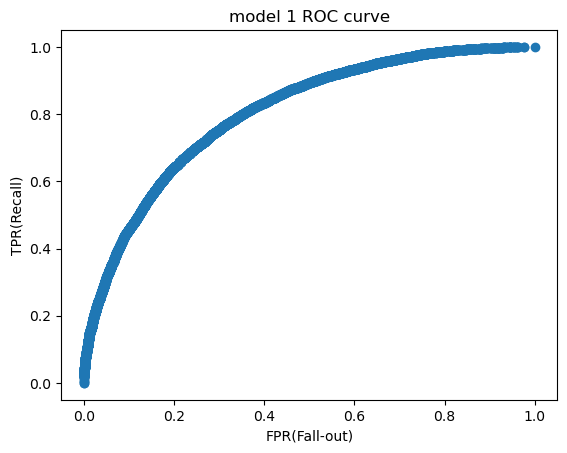

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# roc_curve(타겟값, prob of 1) 그래프 그리기
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_preds)
roc = pd.DataFrame({
 'FPR(Fall-out)': fpr,
 'TPRate(Recall)': tpr,
 'Threshold': thresholds
})
plt.scatter(fpr, tpr)
plt.title('model 1 ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

In [43]:
# 최적의 threshold 구하기
print('idx:', optimal_idx, 'threshold:', optimal_threshold)
# AUC 면적 구하기
auc_score = roc_auc_score(y_valid, y_valid_preds)
print('AUC:', auc_score)

idx: 5656 threshold: 0.3033587358809751
AUC: 0.8045293079442571
